In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


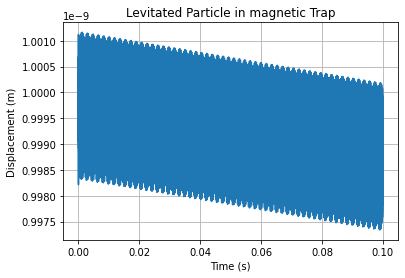

In [4]:


m = 1e-12  # mass in kg (picogram)
gamma = 1e-6  # damping coefficient

# Choose trap type: "optical" or "magnetic"
trap_type = "magnetic"



def harmonic(t, y):

    if trap_type == "optical":
        k = 1e-4     # N/m (optical traps are stiffer)
    if trap_type == "magnetic":
        k = 1e-8     # N/m (magnetic traps are softer, more isolated)
    omega0 = np.sqrt(k / m)
    x, v = y
    dxdt = v
    dvdt = -(k/m)*x - (gamma/m)*v
    return [dxdt, dvdt]

# Initial conditions (displaced particle)
y0 = [1e-9, 0]  # displacement of 1 nm

# Run simulation
t_span = (0, 0.1)
t_eval = np.linspace(0, 0.1, 50000)
sol = solve_ivp(harmonic, t_span, y0, t_eval=t_eval)

# Plot
plt.plot(sol.t, sol.y[0])
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title(f"Levitated Particle in {trap_type} Trap")
plt.grid(True)
plt.show()
